<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/%EC%A3%BC%EC%8B%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_X%EC%84%A0%ED%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# 기술적 지표 선택 과정


## 목적 : 5일 단기 예측

In [ ]:
pip install -U finance-datareader

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import FinanceDataReader as fdr

# 기간 설정
start_date = '20100101'
end_date = '20240107'


# 코스피 지수
ksp = fdr.DataReader('KS11', start_date, end_date)
ksp

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,0.0079,1,13.37,4364595613797,894731590862430
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,-0.0033,2,-5.52,6830723338336,891901043372630
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,0.0087,1,14.70,6391016648164,899645119495585
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,-0.0128,2,-21.87,7498405146704,888111373913575
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,0.0070,1,11.81,6965072761490,894080129850645
...,...,...,...,...,...,...,...,...,...,...
2023-12-28,2616.27,2655.28,2611.72,2655.28,460086621,0.0160,1,41.78,9418929602384,2126372515851046
2024-01-02,2645.47,2675.80,2641.88,2669.81,409871688,0.0055,1,14.53,9628190129018,2147223894556881
2024-01-03,2643.54,2643.72,2607.31,2607.31,463131608,-0.0234,2,-62.50,10121578328315,2096573473823721


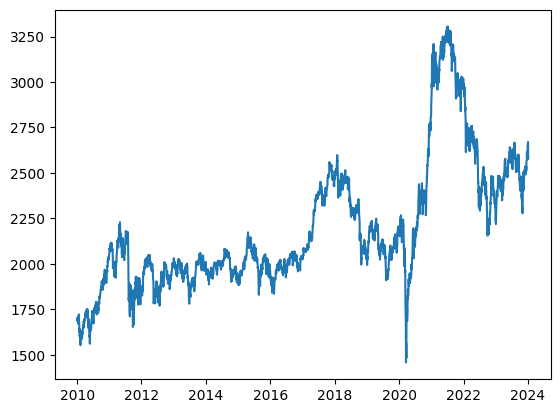

In [ ]:
plt.plot(ksp.index,ksp["Close"])



---



논문 속 지표들
> 1. minus-DI, plus-DI, ATR, Bollinger band, MACD, Stochastic, Moving Average  
> 2. RSI, Moving Average, Momentum  
> 3. SMA, EMA, stochastic, RSI, MACD, 이격도(disparity)  
> 4. ATR, DMI, 60 Volatility, MACD, SAR, Mean  

* 공통적으로 많이 나오는 지표: RSI, stochastic, Moving average(SMA,EMA),MACD 위주로 살펴봄
* 대부분 TA 라이브러리에 존재

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=bd34a62d17635bdab2f4aaad27e61b4fc90163c44d0064c2f17c4587a837b2a7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# 원/달러 환율
exc = fdr.DataReader('USD/KRW', start_date, end_date)
ksp['Exchange Rate'] = exc['Close']

# S&P 500 지수
sp = fdr.DataReader('US500', start_date, end_date)
ksp['S&P500'] = sp['Close']

# 코스닥 지수
kos = fdr.DataReader('KQ11', start_date, end_date)
ksp['KOSDAQ'] = kos['Close']

# 다우 지수
dow = fdr.DataReader('DJI', start_date, end_date)
ksp['dow'] = dow['Close']

# 나스닥 지수
nas = fdr.DataReader('IXIC', start_date, end_date)
ksp['NASDAQ'] = nas['Close']

# 미국 시장 영향 많이 받음 -> 미국 관련 지수 S&P500, 다우, 나스닥

In [ ]:
import ta

# 사용가능한 지표 모두 추가 -> 다양하게 예측해봤을때 공통적으로 중요도가 높은 피처만 골라감

H, L, C, V = ksp['High'], ksp['Low'], ksp['Close'], ksp['Volume']


ksp['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)

ksp['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)

ksp['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
ksp['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)

ksp['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
ksp['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)

ksp['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
ksp['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
ksp['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)

# Volatility
ksp['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
ksp['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
ksp['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
ksp['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
ksp['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
ksp['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
ksp['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
ksp['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
ksp['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
ksp['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
ksp['SMA_5'] = ta.trend.sma_indicator(close=C, window=5, fillna=True)
ksp['SMA_10'] = ta.trend.sma_indicator(close=C, window=10, fillna=True)
ksp['SMA_20'] = ta.trend.sma_indicator(close=C, window=20, fillna=True)
ksp['EMA_5'] = ta.trend.ema_indicator(close=C, window=5, fillna=True)
ksp['EMA_10'] = ta.trend.ema_indicator(close=C, window=10, fillna=True)
ksp['EMA_20'] = ta.trend.ema_indicator(close=C, window=20, fillna=True)
ksp['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
ksp['MACD'] = ta.trend.macd(close=C, fillna=True)
ksp['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
ksp['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
ksp['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
ksp['TRIX'] = ta.trend.trix(close=C, fillna=True)
ksp['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
ksp['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
ksp['DPO'] = ta.trend.dpo(close=C, fillna=True)
ksp['KST'] = ta.trend.kst(close=C, fillna=True)
ksp['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
ksp['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
ksp['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
ksp['RSI'] = ta.momentum.rsi(close=C, fillna=True)
ksp['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
ksp['TSI'] = ta.momentum.tsi(close=C, fillna=True)
ksp['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
ksp['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
ksp['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
ksp['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
ksp['KAMA'] = ta.momentum.kama(close=C, fillna=True)
ksp['ROC'] = ta.momentum.roc(close=C, fillna=True)
ksp['PPO'] = ta.momentum.ppo(close=C, fillna=True)
ksp['PVO'] = ta.momentum.pvo(volume=V, fillna=True)

In [ ]:
ksp.shape

(3457, 64)



---



In [ ]:
# NaN값 이전 값으로 대체
ksp = ksp.fillna(method='ffill')

In [ ]:
ksp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3457 entries, 2010-01-04 to 2024-01-05
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3457 non-null   float64
 1   High           3457 non-null   float64
 2   Low            3457 non-null   float64
 3   Close          3457 non-null   float64
 4   Volume         3457 non-null   int64  
 5   Change         3457 non-null   float64
 6   UpDown         3457 non-null   int64  
 7   Comp           3457 non-null   float64
 8   Amount         3457 non-null   int64  
 9   MarCap         3457 non-null   int64  
 10  Exchange Rate  3457 non-null   float64
 11  S&P500         3457 non-null   float64
 12  KOSDAQ         3457 non-null   float64
 13  dow            3457 non-null   float64
 14  NASDAQ         3457 non-null   float64
 15  MFI            3457 non-null   float64
 16  ADI            3457 non-null   float64
 17  OBV            3457 non-null   int

In [ ]:
# 랜덤 포레스트를 위해 Label을 int형으로 변경
ksp = ksp.astype({'Close': 'int'})

In [ ]:
from sklearn.model_selection import train_test_split


# train을 2010~2020 / test를 2021~현재로 설정
X = ksp[ksp.columns.difference(['Close'])]
y = ksp[['Close']]

X_train = X.loc[X.index < '2020-12-31',:]
y_train = y.loc[y.index < '2020-12-31',:]
X_test = X.loc[X.index >= '2020-12-31',:]
y_test = y.loc[y.index >= '2020-12-31',:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(ksp.shape)

(2714, 63)
(743, 63)
(2714, 1)
(743, 1)
(3457, 64)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.feature_importances_, '\n')

[0.01525062 0.01611302 0.01536173 0.01634934 0.01390048 0.01615455
 0.01793104 0.01495254 0.01489652 0.01650208 0.01749368 0.01968656
 0.01956691 0.01104665 0.01023266 0.01333112 0.01757043 0.01460159
 0.01234492 0.02124713 0.01793389 0.0176592  0.01605828 0.03218322
 0.01255101 0.01464173 0.01249387 0.01210406 0.01219853 0.01655276
 0.01419806 0.03396091 0.01341619 0.01663762 0.01716231 0.01808393
 0.01445416 0.01404546 0.01591085 0.02406775 0.01354039 0.01873113
 0.01019525 0.01541571 0.01617269 0.01451954 0.0145832  0.01167769
 0.01842568 0.0165328  0.01277176 0.01547938 0.01425543 0.01417298
 0.01462168 0.01708724 0.00413192 0.01306204 0.01817827 0.01757399
 0.01692008 0.01597791 0.01512586] 



In [ ]:
ser = pd.Series(rf.feature_importances_, index=X.columns)

# 내림차순 정렬
top = ser.sort_values(ascending=False)
print(top)

Low              0.033961
High             0.032183
Open             0.024068
EMA_5            0.021247
Change           0.019687
                   ...   
SMA_20           0.011678
DCH              0.011047
DCL              0.010233
Parabolic SAR    0.010195
UpDown           0.004132
Length: 63, dtype: float64


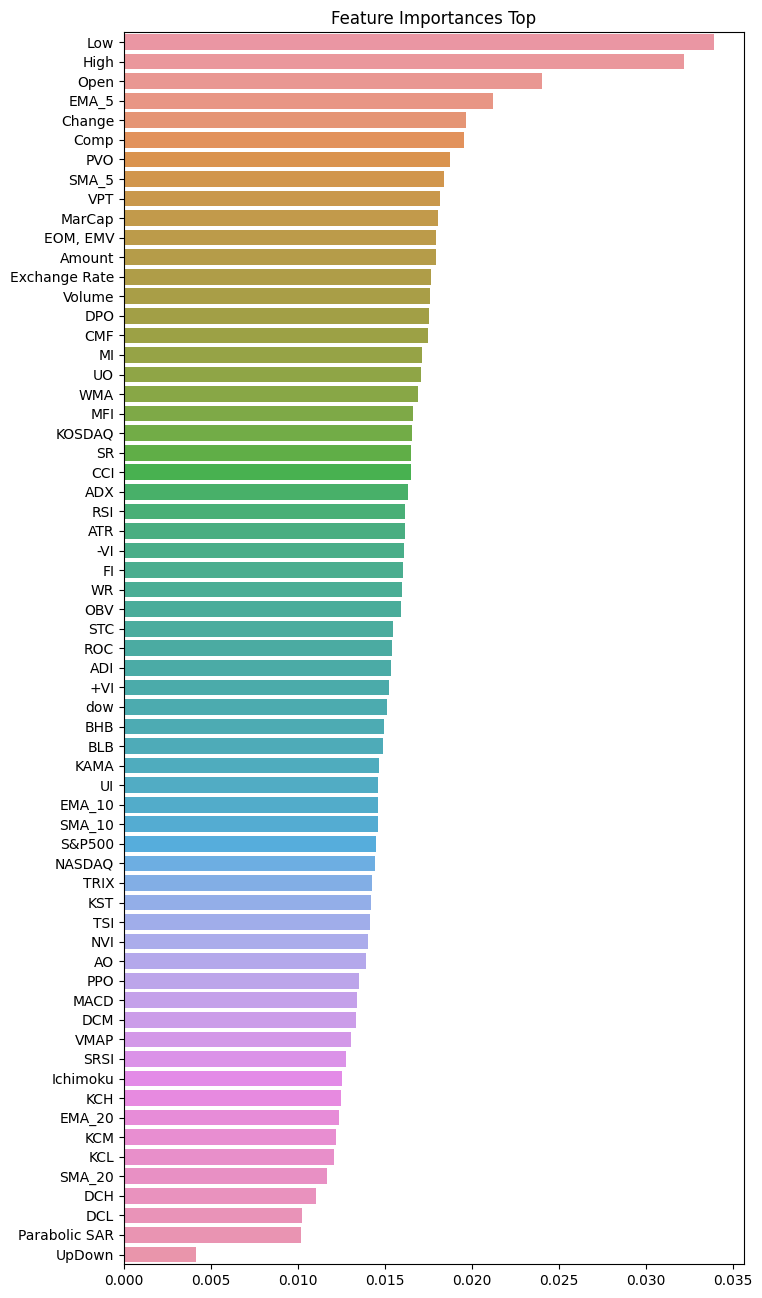

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,16))
plt.title('Feature Importances Top')
sns.barplot(x=top, y=top.index)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

pred = rf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('랜덤 포레스트 RMSE: {:.4f}'.format(rmse))

랜덤 포레스트 RMSE: 186.9963


### 기본 변수들 제외한 상위 지표들 :
#### (y를 종가로 했을때)
**EMA_5** : 5일 지수 이동 평균  
**PVO** : <u>모멘텀</u> 지표. 양수이면 최근 거래량 증가, 음수이면 감소함을 나타냄  
**SMA_5** : 5일 단순 이동 평균  
**VPT** : 가격의 변동에 따른 거래량 변화 추적. OBV보다 좋음   
**EOM** or **EMV**: 거래량과 모멘텀을 동시에 측정. 값이 0에 가까울수록 추세가 뚜렷하지 않음을 나타냄  
**Exchange Rate** : 원/달러 환율  
**DPO** : 추세를 제거하여 주가의 단기적인 변동성을 파악.지표.  
**CMF** : 매수, 매도 압력의 강도와 거래량을 측정  
**MI** : 일일 변동성(고가-저가)을 EMA를 이용하여 측정  
**UO** : <u>모멘텀</u> 지표. 현재 시장의 매수 압력의 정도 측정  
**WMA** : 가중 이동 평균  
**MFI** : 매수와 매도의 상대 강도를 측정. 거래량을 감안한 <u>RSI</u>라고 볼 수 있음  
**KOSDAQ** : 코스닥    
**SR** : <u>스토캐스틱</u>. 단기 예측시 fastk_period 매개변수 설정 가능  
**CCI** :  현재의 주가가 이동평균으로부터 얼마나 떨어져있는지



> 이동평균은 하나만 사용(다중공선성)  
> 논문에서 많이 사용된 MACD, RSI, ATR 은?





---



## 데이터 기간 2010~2017로 했을때 (COVID-19 이전까지)
EMA_5, VPT, PVO, EOM or EMV, DPO, SMA_5, CMF, Exchange Rate, WMA는 공통  
MACD, RSI, ATR는 역시 없음

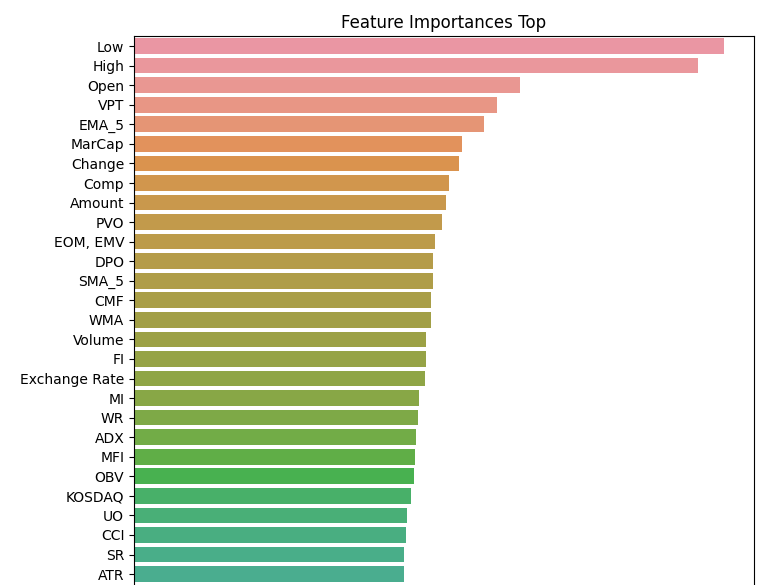



---



## 데이터 기간 줄여봄 -> 8~10월로 11월 예측 / 11월 3주로 마지막주 예측

### 어느 기간을 예측하냐에 따라 지표가 다 뒤바뀜 -> 공통적인 것 위주로 살펴봄

### **항상 상위권이었던 10가지** : EMA_5, PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ

### **단기로 갈수록 중요도 증가** : RSI, WR, MACD

## 뽑은 X 피처들  
### (y를 종가로 했을때)


**Exchange Rate** : 원/달러 환율  
**KOSDAQ** : 코스닥   


< 거래량(Volume) 관련 지표 >  

**MFI** : 매수와 매도의 상대 강도를 측정. 거래량을 감안한 RSI라고 볼 수 있음(같이 쓰면 좋음)  
**CMF** : 매수, 매도 압력의 강도와 거래량을 측정  
**EOM** or **EMV**: 거래량과 모멘텀을 동시에 측정. 값이 0에 가까울수록 추세가 뚜렷하지 않음을 나타냄  
**VPT** : 가격의 변동에 따른 거래량 변화 추적. OBV보다 좋음   


< 추세(Trend) 관련 지표 >  

**EMA_5** : 5일 지수 이동 평균  
**MACD** : 이동평균수렴발산  
**DPO** : 추세를 제거하여 주가의 단기적인 변동성을 파악.지표.  


< 모멘텀 관련 지표>

**RSI** : 상대강도지수  
**SR** : 스토캐스틱. 단기 예측시 fastk_period 매개변수 설정 가능  
**WR** : 과매도와 과매수 수준 파악  
**PVO** : 양수이면 최근 거래량 증가, 음수이면 감소함을 나타냄  

In [ ]:
import FinanceDataReader as fdr

# 원하는 기간 설정
start_date = '20100101'
end_date = '20240107'


# 코스피 지수
ksp = fdr.DataReader('KS11', start_date, end_date)
ksp.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,0.0079,1,13.37,4364595613797,894731590862430
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,-0.0033,2,-5.52,6830723338336,891901043372630
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,0.0087,1,14.70,6391016648164,899645119495585
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,-0.0128,2,-21.87,7498405146704,888111373913575
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,0.0070,1,11.81,6965072761490,894080129850645


In [ ]:
import ta

# 13가지 피처 추가

H, L, C, V = ksp['High'], ksp['Low'], ksp['Close'], ksp['Volume']

# 원/달러 환율
exc = fdr.DataReader('USD/KRW', start_date, end_date)
ksp['Exchange Rate'] = exc['Close']

# 코스닥 지수
kos = fdr.DataReader('KQ11', start_date, end_date)
ksp['KOSDAQ'] = kos['Close']

# Volume 관련 지표
ksp['MFI'] = ta.volume.money_flow_index(high=H, low=L, close=C, volume=V, fillna=True)
ksp['CMF'] = ta.volume.chaikin_money_flow(high=H, low=L, close=C, volume=V, fillna=True)
ksp['EOM, EMV'] = ta.volume.ease_of_movement(high=H, low=L, volume=V, fillna=True)
ksp['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)

# Volatility 관련 지표
ksp['ATR'] = ta.volatility.average_true_range(high=H, low=L, close=C, fillna=True)

# 추세 관련 지표
ksp['EMA_5'] = ta.trend.ema_indicator(close=C, window=5, fillna=True)
ksp['MACD'] = ta.trend.macd(close=C, fillna=True)
ksp['DPO'] = ta.trend.dpo(close=C, fillna=True)
ksp['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)

# 모멘텀 관련 지표
ksp['RSI'] = ta.momentum.rsi(close=C, fillna=True)
ksp['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
ksp['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
ksp['PVO'] = ta.momentum.pvo(volume=V, fillna=True)

In [ ]:
ksp.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,CMF,"EOM, EMV",VPT,EMA_5,DPO,RSI,SR,WR,PVO,MACD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,0.0079,1,13.37,4364595613797,894731590862430,...,1.000000,0.000000,0.000000e+00,1696.140000,497.558591,100.000000,100.000000,-0.000000,0.000000,0.000000
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,-0.0033,2,-5.52,6830723338336,891901043372630,...,0.144047,21.423366,-1.330594e+06,1694.300000,500.318591,0.000000,43.085106,-56.914894,2.938623,-0.440342
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,0.0087,1,14.70,6391016648164,899645119495585,...,0.356774,17.918324,2.373839e+06,1697.973333,496.338591,74.146131,93.764893,-6.235107,5.495376,0.392329
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,-0.0128,2,-21.87,7498405146704,888111373913575,...,-0.036850,-30.773823,-3.556278e+06,1693.132222,499.816091,33.888129,6.643757,-93.356243,8.140573,-0.704381
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,0.0070,1,11.81,6965072761490,894080129850645,...,0.162742,-94.741495,-8.907777e+05,1693.841481,499.540591,49.753642,67.639529,-32.360471,8.139111,-0.613490


+ EMA가 단기 예측에 더 적절함
+ EMA_5, SMA_5, WMA 모두 넣었을때 보다 EMA_5만 넣은게 더 RMSE 작음
+ 몇일 이동 평균이 적절한지는 데이터 크기에 따라 달랐음. 모델링하면서 조절



---

논문에 자주 사용된 지표인 ATR,CCI도 추가하기로 함  
개수 늘어날수록 정확도 향상된다는 논문 내용 참고

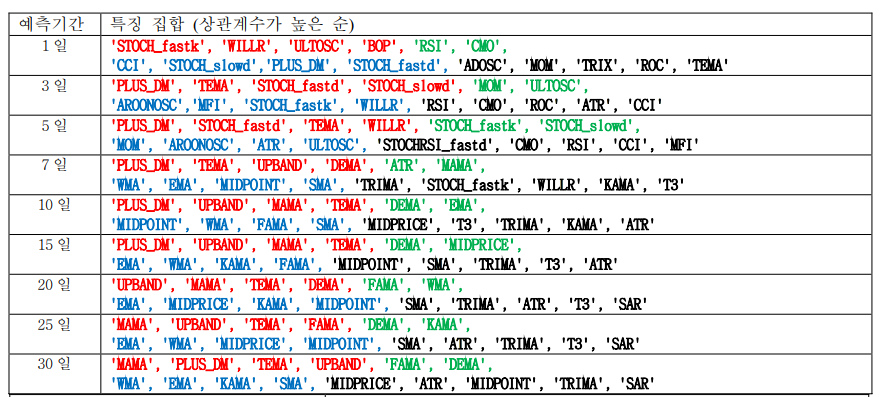

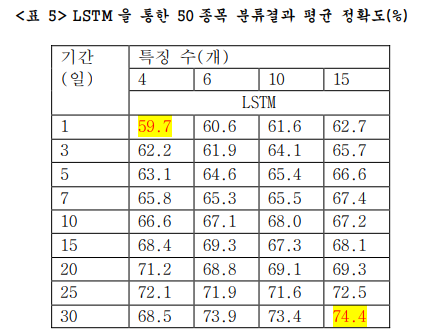



---



## y를 종가 변화율로 해보기
#### (위와 동일한 코드로 진행)
### 1. 2010\~현재, 2010~2017 둘이 비슷 (장기)


PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ, ATR, CCI, WR는 동일하게 상위권  

EMA_5가 낮아짐  
RSI, MACD 는 단기에서 살펴봐야함  

MI, UO, FI 상위권 (y를 종가로 했을때도 높은 지표였으나 다른 비슷한 지표들보다 비교적 낮아서 제외된 지표들)  
+-VI, STC 새로 등장

### 2. 8~10월로 11월 예측 / 11월 3주로 마지막주 예측 (단기)

PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ, CCI, WR는 동일하게 상위권  

RSI는 상위권이지만 MACD는 낮음  

ATR, MACD를 빼고 UO, FI, +-VI 추가하기로 함



## 결론

<그대로 사용>  
항상 상위권이었던 PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ 는 비슷함  
단기에서 중요도 높아졌던 RSI, WR도 비슷함  
넣을까말까 고민했던 CCI는 상위권 됨

<제거>  
넣을까말까 고민했던 ATR, MACD는 하위권 됨

<새로 추가>  
UO, FI  
+-VI





##최종 지표 16가지

EMA_5, PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ, RSI, WR, CCI, UO, FI, +-VI

In [ ]:
import FinanceDataReader as fdr

# 원하는 기간 설정
start_date = '20100101'
end_date = '20240107'


# 코스피 지수
ksp = fdr.DataReader('KS11', start_date, end_date)
ksp.head()

In [ ]:
import ta

# 16가지 피처 추가

H, L, C, V = ksp['High'], ksp['Low'], ksp['Close'], ksp['Volume']

# 원/달러 환율
exc = fdr.DataReader('USD/KRW', start_date, end_date)
ksp['Exchange Rate'] = exc['Close']

# 코스닥 지수
kos = fdr.DataReader('KQ11', start_date, end_date)
ksp['KOSDAQ'] = kos['Close']

# Volume 관련 지표
ksp['MFI'] = ta.volume.money_flow_index(high=H, low=L, close=C, volume=V, fillna=True)
ksp['CMF'] = ta.volume.chaikin_money_flow(high=H, low=L, close=C, volume=V, fillna=True)
ksp['EOM, EMV'] = ta.volume.ease_of_movement(high=H, low=L, volume=V, fillna=True)
ksp['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
ksp['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)

# 추세 관련 지표
ksp['EMA_5'] = ta.trend.ema_indicator(close=C, window=5, fillna=True)
ksp['DPO'] = ta.trend.dpo(close=C, fillna=True)
ksp['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
ksp['-VI'] = ta.trend.vortex_indicator_neg(high=H, low=L, close=C, fillna=True)
ksp['+VI'] = ta.trend.vortex_indicator_pos(high=H, low=L, close=C, fillna=True)

# 모멘텀 관련 지표
ksp['RSI'] = ta.momentum.rsi(close=C, fillna=True)
ksp['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
ksp['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
ksp['PVO'] = ta.momentum.pvo(volume=V, fillna=True)
ksp['UO'] = ta.momentum.ultimate_oscillator(high=H, low=L, close=C, fillna=True)